In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S3/Office_Pamela-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [13]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="MSE")

In [14]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 5s 22ms/step - loss: 883.8708
Epoch 2/300
45/45 [==============================] - 1s 20ms/step - loss: 738.3995
Epoch 3/300
45/45 [==============================] - 1s 21ms/step - loss: 572.8925
Epoch 4/300
45/45 [==============================] - 1s 21ms/step - loss: 456.8471
Epoch 5/300
45/45 [==============================] - 1s 21ms/step - loss: 359.2869
Epoch 6/300
45/45 [==============================] - 1s 21ms/step - loss: 276.3368
Epoch 7/300
45/45 [==============================] - 1s 20ms/step - loss: 215.0246
Epoch 8/300
45/45 [==============================] - 1s 20ms/step - loss: 183.9114
Epoch 9/300
45/45 [==============================] - 1s 20ms/step - loss: 164.6606
Epoch 10/300
45/45 [==============================] - 1s 20ms/step - loss: 149.0083
Epoch 11/300
45/45 [==============================] - 1s 20ms/step - loss: 130.8367
Epoch 12/300
45/45 [==============================] - 1s 20ms/step - loss: 114.6132
E

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 2.2917126107870396
RMSE for BiLSTM Model for testing is: 2.881442853805184
MAE for BiLSTM Model for training is: 1.6790481354798115
MAE for BiLSTM Model for testing is: 1.9559215054628956
MAPE for BiLSTM Model for training is: 0.06448719488276479
MAPE for BiLSTM Model for testing is: 0.08019047424603121


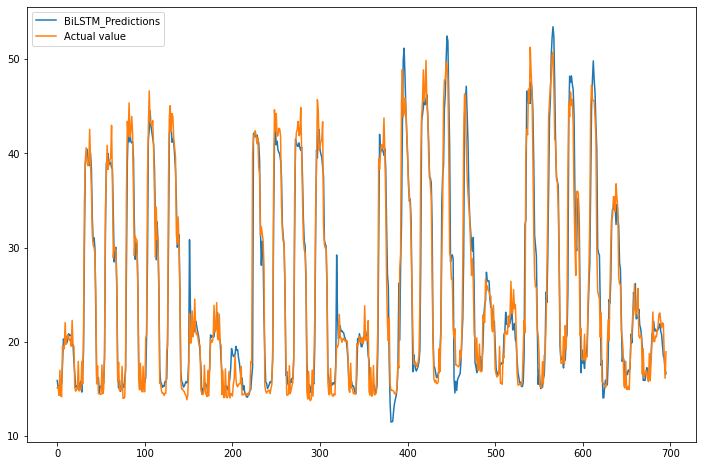

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([15.11666667]), array([15.8904085], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.77374185]), array([0.10004578]), array([-0.99770457]), array([1.59511337]), array([-1.45240224]), array([-1.38460751]), array([1.92732289]), array([-0.95876935]), array([-0.70665906]), array([1.78230171]), array([-0.58201625]), array([0.55670445]), array([0.45133412]), array([-0.42152888]), array([-0.50754166]), array([-0.39777654]), array([-1.14121196]), array([2.56642761]), array([-0.07514954]), array([1.63971774]), array([-1.47944756]), array([-0.4288882]), array([-0.35293999]), array([-0.19769516]), array([2.922033]), array([-0.83666954]), array([-0.03841019]), array([-0.94140409]), array([3.27391236]), array([-1.01137898]), array([1.98245277]), array([4.68365059]), array([0.25658519]), array([0.95557938]), array([-1.40291698]), array([-0.8517807]), array([-0.14652913]), array([3.86774724]), array([-0.91145579]), array([-2.22560908]), array([-1.66195679]), array([-0.34429296]), array([-1.03050588]), array([-0.58871651]), array([2.35344429]), array([-0.67685661]), array([

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([22.72698174]), array([-11.47837932]))

In [22]:
max(d1)-min(d1)

array([34.20536105])

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(402, 294)